### Naive Bayes (Classifier) - Multinomial Naive Bayes



In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

data = pd.read_csv('Weather.csv')

In [2]:
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,No,no
1,sunny,hot,high,Yes,no
2,overcast,hot,high,No,yes
3,rainy,mild,high,No,yes
4,rainy,cool,normal,No,yes


In [3]:
data.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,normal,No,yes
freq,5,6,7,8,9


### Data Preparation

In [4]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [5]:
# Converting string labels into numbers.
data['Outlook_encoded'] = le.fit_transform(data['Outlook'])
data['Tem_encoded'] = le.fit_transform(data['Temperature'])
data['Humidity_encoded'] = le.fit_transform(data['Humidity'])
data['Windy_enoded'] = le.fit_transform(data['Windy'])
data['Label'] = le.fit_transform(data['Play'])

In [6]:
data

,Outlook,Temperature,Humidity,Windy,Play,Outlook_encoded,Tem_encoded,Humidity_encoded,Windy_enoded,Label
0,sunny,hot,high,No,no,2,1,0,0,0
1,sunny,hot,high,Yes,no,2,1,0,1,0
2,overcast,hot,high,No,yes,0,1,0,0,1
3,rainy,mild,high,No,yes,1,2,0,0,1
4,rainy,cool,normal,No,yes,1,0,1,0,1
5,rainy,cool,normal,Yes,no,1,0,1,1,0
6,overcast,cool,normal,Yes,yes,0,0,1,1,1
7,sunny,mild,high,No,no,2,2,0,0,0
8,sunny,cool,normal,No,yes,2,0,1,0,1
9,rainy,mild,normal,No,yes,1,2,1,0,1


In [7]:
# define independent attributes 
features = list(data.columns[5:9])
# assign values for independent variables and target variable ('Label')
X = data [features]
y = data ['Label']

In [8]:
features

['Outlook_encoded', 'Tem_encoded', 'Humidity_encoded', 'Windy_enoded']

In [9]:
X

,Outlook_encoded,Tem_encoded,Humidity_encoded,Windy_enoded
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


### Model Building

In [10]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

#### you may want to look at the description for MultinomialNB() to see what parameters you could tune for this model
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### Model Evaluation

In [11]:
# import cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict

In [12]:
score = cross_val_score(mnb,X,y,cv=3)

In [13]:
score.mean()

0.7999999999999999

#### Again, accuracy is not only the matrix we should rely or focus on, espectially for imbalanced dataset regarding the target variable and uneven cost for FP and FN. You should also look at the classification report 

In [14]:
# import libararies for evaluation measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
y_pred = cross_val_predict(mnb,X,y,cv=3)

In [16]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [17]:
mnb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
mnb.class_count_

array([5., 9.])

In [19]:
class MultiEncoder:
    def __init__(self):
        self.encoders = dict()
    
    # df: pd.DataFrame
    def fit(self, df):
        for key in df.columns:
            self.encoders[key] = preprocessing.LabelEncoder().fit(df[key])

    # input: dict or pd.DataFrame
    def transform(self, input):
        if isinstance(input, dict):
            out = {}
            for key in input.keys():
                out[key] = self.encoders[key].transform([input[key]])[0]
        
        if isinstance(input, pd.DataFrame):
            out = pd.DataFrame()
            for key in input.columns:
                out[key] = self.encoders[key].transform(input[key])

        return out

In [20]:
classes = ['Outlook', 'Temperature', 'Humidity', 'Windy']

multi_encoder = MultiEncoder()
multi_encoder.fit(data[classes])

In [21]:
sample_dict = {'Outlook': 'overcast', 'Temperature': 'cool', 'Humidity': 'high', 'Windy': 'No'}
X_transformed = list(multi_encoder.transform(sample_dict).values())
X_transformed

[0, 0, 0, 0]

In [22]:
# Lab quiz question 2
X_transformed = [0, 0, 0, 0]
mnb.predict([X_transformed])[0]

1

In [23]:
mnb.predict_proba([X_transformed])[0]

array([0.35714286, 0.64285714])

In [24]:
sample_df = pd.DataFrame({'Outlook': ['overcast', 'overcast'],
                          'Temperature': ['cool', 'cool'],
                          'Humidity': ['high', 'high'],
                          'Windy': ['Yes', 'No']})

X_transformed = multi_encoder.transform(sample_df)
X_transformed

,Outlook,Temperature,Humidity,Windy
0,0,0,0,1
1,0,0,0,0


In [25]:
mnb.predict(X_transformed)

array([1, 1])

In [26]:
# write codes to create classification report
print(classification_report(y, y_pred))

precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



In [27]:
y_proba_pred = cross_val_predict(mnb, X, y, cv=3, method = 'predict_proba')

In [28]:
y_proba_pred

array([[0.47058824, 0.52941176],
       [0.51612903, 0.48387097],
       [0.33333333, 0.66666667],
       [0.4       , 0.6       ],
       [0.26229508, 0.73770492],
       [0.29158402, 0.70841598],
       [0.19678715, 0.80321285],
       [0.46053515, 0.53946485],
       [0.33062011, 0.66937989],
       [0.15099679, 0.84900321],
       [0.40584561, 0.59415439],
       [0.44956178, 0.55043822],
       [0.19846069, 0.80153931],
       [0.53477075, 0.46522925]])

#### Once you have the predict probabilities, you can use these to build ROC curve for furtuer evaluation

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [30]:
# write codes to construct ROC curve
fpr, tpr, thresholds = roc_curve(y.values.ravel(), y_proba_pred[:, 1])
auc(fpr, tpr)

0.888888888888889

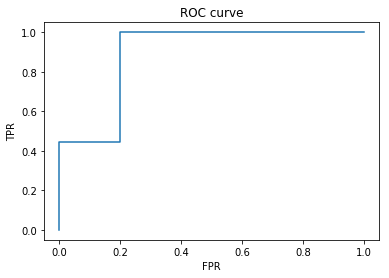

In [31]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()